# Importing The Libraries
###### Import the essential libraries to get started!

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Fetch the Data
###### Since, I have already cleaned the Titanic data-set in my previous notebook. Hence, I will be using the cleaned Data-set

In [92]:
df = pd.read_csv('Titanic_Na_less.csv')

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [205]:
df.drop('Unnamed: 0', inplace=True, axis=1)
#Since it has a useless column

## Analysis over the "Survived" column

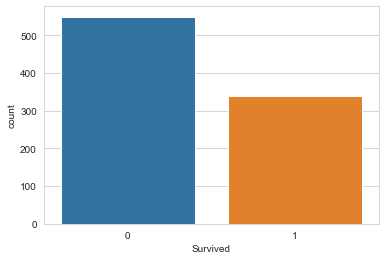

In [96]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

###### Unfortunately, more people died than survived.

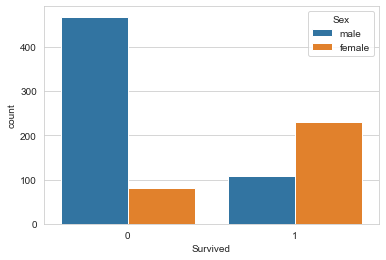

In [97]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

###### More Male passengers died, as compared to Female passengers. But will dig deeper to find the logic behind this result

## Let's check the total percentage of Male and Female in general

In [98]:
df['Sex'].value_counts(normalize=True)

male      0.649044
female    0.350956
Name: Sex, dtype: float64

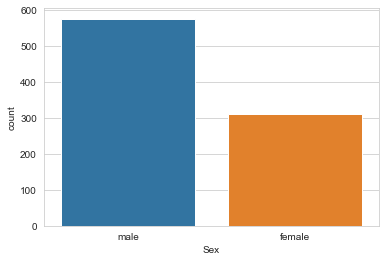

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df)

#### Seems like, there were already more Male passengers as compared to female in general. Therefore, that can be a reason behind the more death of the Male passengers.

## Feature Engineering
#### Let's categorize the Age column

In [100]:
def process_age(df,cut_points,label_names):
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [0,5,12,18,35,60,100]
label_names = ["Infant","Child","Teenager","Young Adult","Adult","Senior"]
df = process_age(train,cut_points,label_names)



In [101]:
df["Age_categories"].value_counts()

Young Adult    505
Adult          224
Teenager        70
Infant          44
Child           25
Senior          21
Name: Age_categories, dtype: int64

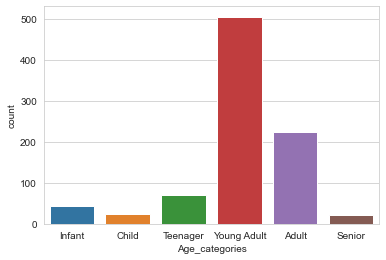

In [102]:
sns.countplot(x="Age_categories", data=df)

### Young Adults had the majority in the list of passengers

##### Let's check their survival rate

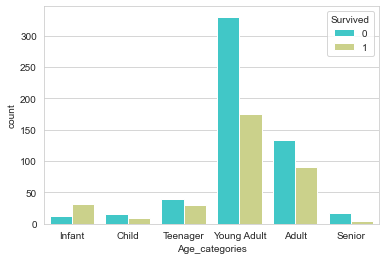

In [103]:
sns.set_style('whitegrid')
sns.countplot(x='Age_categories',hue='Survived',data=df,palette='rainbow')

###### It clearly states that, Young Adults had less survival rate, amongst all. However, Infant's rate of survival is the highest. 
*Seems like a great sacrifice by the Young Adults in order to save the fellow passengers.*

#### As I observed a pattern in the name, let's see if the Title(the prefix of name) has to do anything with the survival.

In [134]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

In [135]:
df['Title'] = df['Name'].apply(get_title)

In [165]:
Tot_Pass = df["Title"].value_counts()
Tot_Pass

#Total Number of passengers according to their titles

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Lady              1
Don               1
the Countess      1
Mme               1
Sir               1
Ms                1
Jonkheer          1
Capt              1
Name: Title, dtype: int64

In [166]:
Surv_Pass = df.groupby("Title").sum()["Survived"]
Surv_Pass
#Number of passengers who survived

Title
Capt              0
Col               1
Don               0
Dr                3
Jonkheer          0
Lady              1
Major             1
Master           23
Miss            126
Mlle              2
Mme               1
Mr               81
Mrs              98
Ms                1
Rev               0
Sir               1
the Countess      1
Name: Survived, dtype: int64

In [196]:
Dead_Pass = df["Title"].value_counts() - df.groupby("Title").sum()["Survived"]
Dead_Pass
#If we minus from the number of Total passengers by the Total number of surviving passengers.
#Then we can get this observation of number of death as per the title

Capt              1
Col               1
Don               1
Dr                4
Jonkheer          1
Lady              0
Major             1
Master           17
Miss             55
Mlle              0
Mme               0
Mr              436
Mrs              26
Ms                0
Rev               6
Sir               0
the Countess      0
dtype: int64

In [199]:
title_df = pd.concat([Tot_Pass, Dead_Pass, Surv_Pass], axis=1)
title_df

,Title,0,Survived
Mr,517,436,81
Miss,181,55,126
Mrs,124,26,98
Master,40,17,23
Dr,7,4,3
Rev,6,6,0
Major,2,1,1
Mlle,2,0,2
Col,2,1,1
Lady,1,0,1


In [201]:
title_df.columns = ["TotalNo. of Pass", "Dead", "Survived"]

In [202]:
title_df

,TotalNo. of Pass,Dead,Survived
Mr,517,436,81
Miss,181,55,126
Mrs,124,26,98
Master,40,17,23
Dr,7,4,3
Rev,6,6,0
Major,2,1,1
Mlle,2,0,2
Col,2,1,1
Lady,1,0,1


In [210]:
Perc_Pass = Surv_Pass / Tot_Pass * 100
Perc_Pass

Capt              0.000000
Col              50.000000
Don               0.000000
Dr               42.857143
Jonkheer          0.000000
Lady            100.000000
Major            50.000000
Master           57.500000
Miss             69.613260
Mlle            100.000000
Mme             100.000000
Mr               15.667311
Mrs              79.032258
Ms              100.000000
Rev               0.000000
Sir             100.000000
the Countess    100.000000
dtype: float64

In [212]:
title_df = pd.concat([Tot_Pass, Dead_Pass, Surv_Pass], axis=1)

,TotalNo. of Pass,Dead,Survived,Percentage of Survival(%)
Mr,517,436,81,15.667311
Miss,181,55,126,69.613260
Mrs,124,26,98,79.032258
Master,40,17,23,57.500000
Dr,7,4,3,42.857143
Rev,6,6,0,0.000000
Major,2,1,1,50.000000
Mlle,2,0,2,100.000000
Col,2,1,1,50.000000
Lady,1,0,1,100.000000


In [241]:
cm = sns.light_palette("green", as_cmap=True)
# using seaborn color palette as well as 
# in each column 
 
title_df.style.background_gradient(cmap=cm).set_precision(1).highlight_min(axis=1,color='red').highlight_max(axis=0, color='blue')


,TotalNo. of Pass,Dead,Survived,Percentage of Survival(%)
Mr,517,436,81,15.7
Miss,181,55,126,69.6
Mrs,124,26,98,79.0
Master,40,17,23,57.5
Dr,7,4,3,42.9
Rev,6,6,0,0.0
Major,2,1,1,50.0
Mlle,2,0,2,100.0
Col,2,1,1,50.0
Lady,1,0,1,100.0


###### As per the observance: Reverend, Don, Jonkheer & Captain couldn't survive.
###### Mr. also had the low rate in terms of Survival, however this title in particular was in the majority in the list of passengers.
###### Those who had the highest survival rate, they belonged to a higher class in the society.
###### Age played the major role in the survival, thus the younger the passenger the higher the chance of survival


# Let's observe some more patterns!

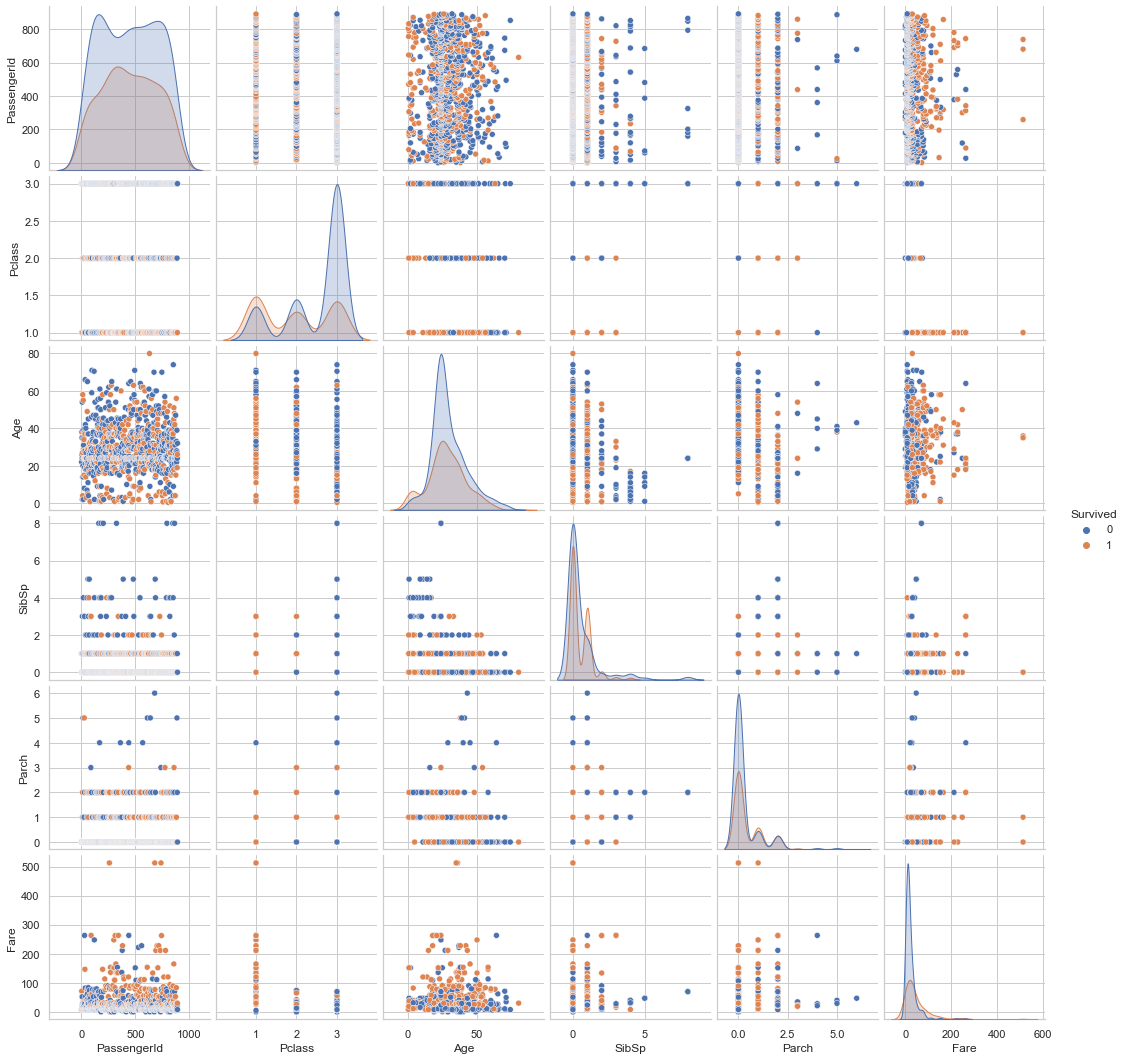

In [206]:
sns.pairplot(data=df, hue="Survived")

## To be continued!!